In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
loan = pd.read_csv("loan_data_set.csv")
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Outliers:
- What is an outlier?
- In statistics, an outlier is a data point that differs significantly from other observations.

- Examples of Outliers: In cricket, Sachin and Kohli are outliers. In an organization, CEO salary is an outlier. In Football, Ronaldo is an outlier.

### Note: Outlier can be only present in Numerical columns. Text data cannot have outliers

In [5]:
arr = np.array([5, 3, 20, 15, 23, 12, 7, 8, 150])
arr

array([  5,   3,  20,  15,  23,  12,   7,   8, 150])

In [8]:
# Calculating the mean of the array
arr.mean()

27.0

In [11]:
np.median(arr)

12.0

In [ ]:
min = 3
max = 23

# Note:

- Avg salary of an org (not including CEO salary) = 2.5 lakhs / per month
- Avg salary of an org (include the CEO salary) = 55 lakhs / per month

- Conclusion: Having outliers will misleads the avg calculation.
- Outliers do not give wrong result instead they give misleading results

# How to find outliers from the data?
#### 6 Methods to find outliers from the data:

1. Boxplot method(most popular method)
2. Scatter plot method
3. kde plot Method
4. describe method
5. skew method
6. IQR method

In [17]:
arr[8] = 55

<Axes: >

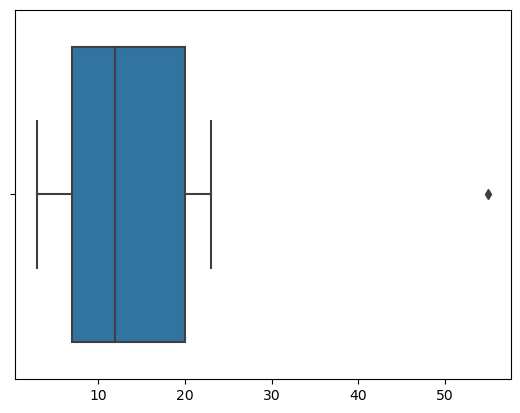

In [20]:
sns.boxplot(x = arr)

<Axes: ylabel='ApplicantIncome'>

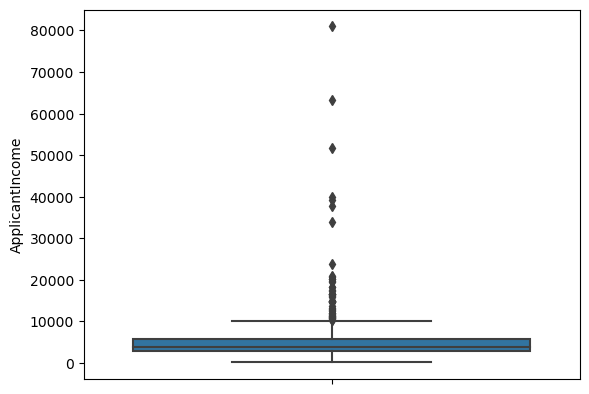

In [22]:
sns.boxplot(y = loan["ApplicantIncome"])

<Axes: >

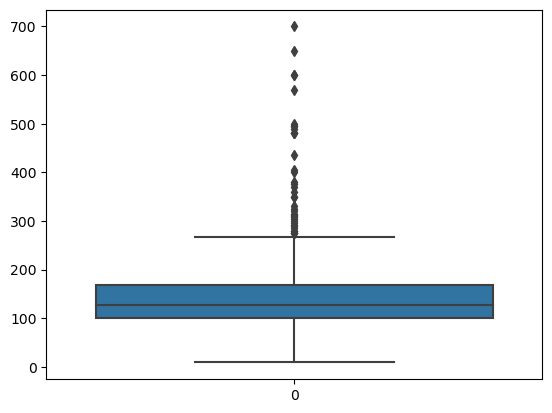

In [24]:
sns.boxplot(loan['LoanAmount'])

In [25]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<Axes: >

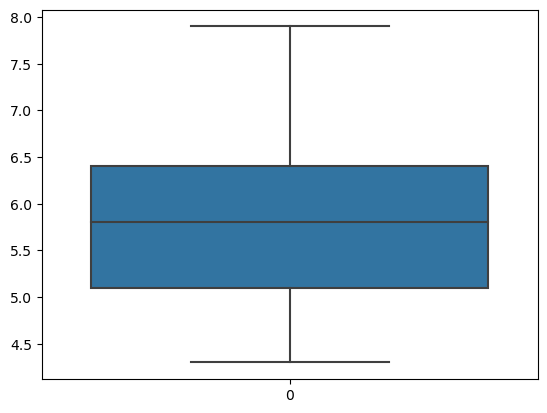

In [26]:
sns.boxplot(iris['sepal_length'])

# Method 2 : Scatterplot Method

<Axes: xlabel='LoanAmount', ylabel='ApplicantIncome'>

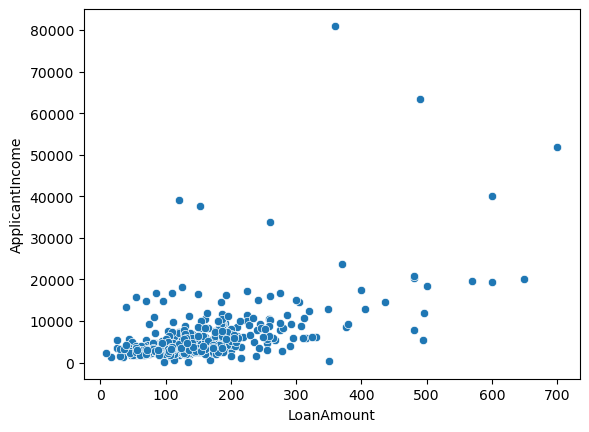

In [29]:
sns.scatterplot(x = loan['LoanAmount'], y = loan['ApplicantIncome'])

# Method 3 : kde plot method 

<Axes: xlabel='ApplicantIncome', ylabel='Density'>

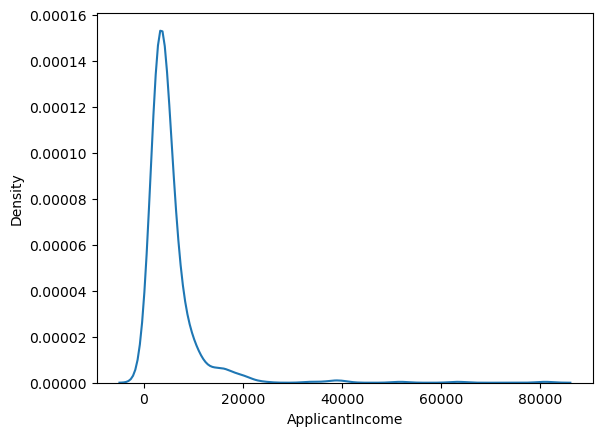

In [30]:
sns.kdeplot(x = loan['ApplicantIncome'])

- Tail in the kdeplot indicate that outliers are present in the data.

In [31]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<Axes: xlabel='sepal_length', ylabel='Density'>

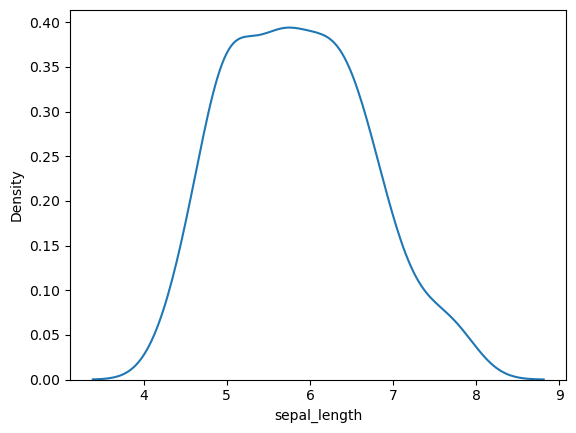

In [32]:
sns.kdeplot(x = iris['sepal_length'])

<Axes: xlabel='sepal_width', ylabel='Density'>

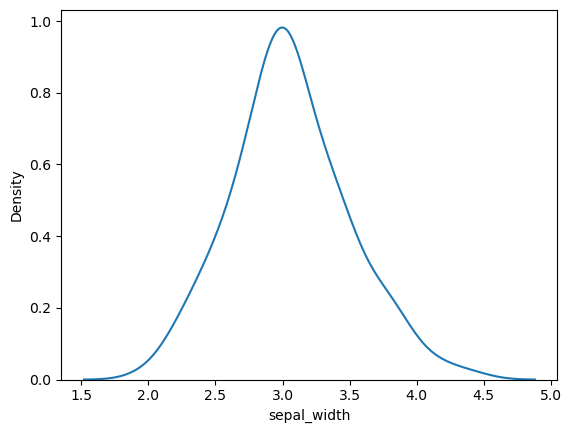

In [33]:
sns.kdeplot(iris['sepal_width'])

<Axes: >

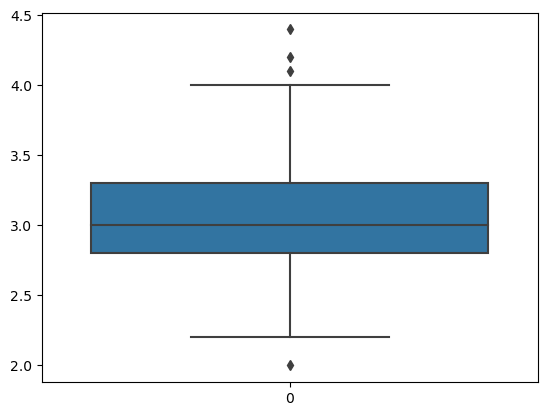

In [34]:
sns.boxplot(iris['sepal_width'])

- iris sepal_width - When we look at the kdeplot method it does not show any outliers. But the boxplot method accurately tell us that sepal_width has outliers on both sides.
- Hence, Boxplot method is most accurate and popular in finding outliers

# Method 4 : Describe()

In [35]:
loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


- The describe method, we have to look at 75% ile value and max value. If the difference is hugh then it is an indication of an outlier

# Method 5 : skew method
- When the skew is calculated, The closer the value to zero the less the chances of outliers.
- If the value is far from zero then it is an indication of the outliers

In [36]:
loan['ApplicantIncome'].skew()

6.539513113994625

In [37]:
iris['sepal_length'].skew()

0.3149109566369728

# Method 6: IQR method

- Any value less than Q1 - 1.5 * IQR and any value greater than Q3 + 1.5 * IQR, we call them as outliers

In [38]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [40]:
loan['LoanAmount'].describe()

count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%      100.000000
50%      128.000000
75%      168.000000
max      700.000000
Name: LoanAmount, dtype: float64

In [42]:
lacol = loan["LoanAmount"]

In [43]:
Q1 = 100
Q3 = 168
IQR = Q3 - Q1

In [44]:
lacol[(lacol < (Q1 - 1.5 * IQR)) | (lacol > (Q3 + 1.5 * IQR))].count()

39

- We get the count of outliers in the output.
- 39 means in Loanamount column there are 39 outlier values
- if the output is zero then it implies there are no outlier values

In [45]:
lacol[(lacol < (Q1 - 1.5 * IQR))].count()

0

- There are no outliers below the lower whisker in the LoanAmount column

In [46]:
lacol[(lacol > (Q3 + 1.5 * IQR))].count()

39

- All 39 outliers are present above the upper whisker

- To get the exact count of outliers in a column then go with Method 6

# Outlier Treatment
- Either you remove the outlier from the data or replace the outlier values with some other values(like a mean value or a median value) we call it as outliers treatment

# 1. Quantile Based Flooring and Capping Method

In [49]:
arr = np.array([10, 25, 34, 67, 75, 48, 96, 29])
arr

array([10, 25, 34, 67, 75, 48, 96, 29])

In [50]:
## Replace all the odd values in the array with 150: For doing this we use np.where method
## np.where(condition, value you want to replace, name of the array)

In [51]:
np.where(arr % 2 == 1, 150, arr)

array([ 10, 150,  34, 150, 150,  48,  96, 150])

<Axes: >

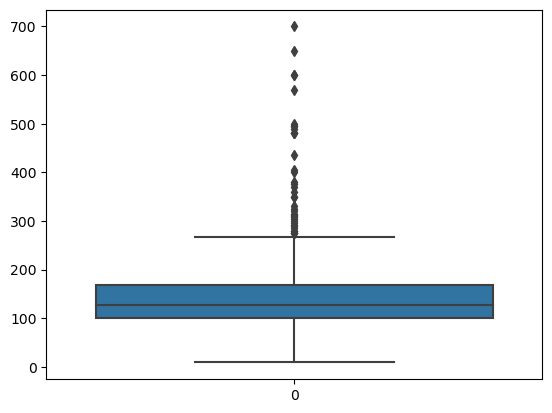

In [52]:
sns.boxplot(loan['LoanAmount'])

In [56]:
## Find out the 80% value and 20% value for the loan amount column

loan["LoanAmount"].quantile(0.8), loan['LoanAmount'].quantile(0.2)

(182.0, 95.0)

In [62]:
loan["LoanAmount"].quantile(0.25)

100.0

In [57]:
loan["LoanAmount"] = np.where(loan["LoanAmount"] > 182, 182, loan["LoanAmount"])
loan["LoanAmount"] = np.where(loan["LoanAmount"] < 95, 95, loan["LoanAmount"])

<Axes: >

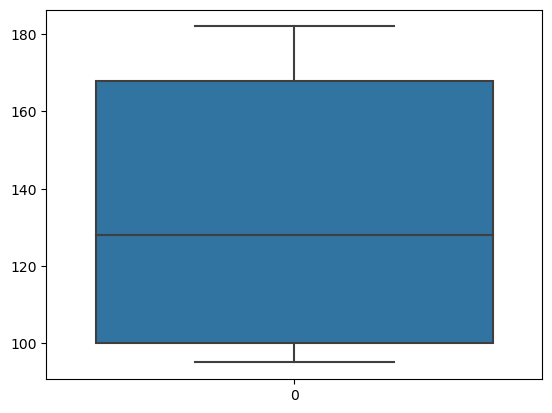

In [58]:
sns.boxplot(loan["LoanAmount"])

- Replacing the outlier values with 80% and 20% values it is more strict treatment.
- Replace the outlier value with 90% and 10% value it is more lienent treatment.
- 85% and 15%, 75% - 25%, 87% - 13%, etc.
- 70% - 30% not be to used